In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

BASE_DIR = os.getcwd()
inputs_path = os.path.join(BASE_DIR, "data", "inputs")
outputs_path = os.path.join(BASE_DIR, "data", "outputs")

In [5]:
SIGNAL_NAME = "tsmom_moskowitz_prod"
dataset_name = 'futures'
SIGNAL_NAME = f"{SIGNAL_NAME}_{dataset_name}"

results_path = os.path.join(outputs_path, "results", f"{SIGNAL_NAME}_individual_bootstrap_selection.csv")
all_results_df = pd.read_csv(results_path)

In [6]:
all_results_df.head()

,name,param,Sharpe_train,Sharpe_test,Gap_Sharpe,Sortino_train,Sortino_test,Gap_Sortino,MaxDD_train,MaxDD_test,Gap_MaxDD,AvgDD_train,AvgDD_test,Gap_AvgDD,asset
0,10th,279,-0.460175,0.638286,1.098462,-0.665297,0.983738,1.649035,-60.131719,-16.527717,43.604002,-34.754313,-6.976604,27.777708,CC
1,20th,255,-0.512823,0.117147,0.629969,-0.713763,0.182230,0.895992,-63.155032,-28.016313,35.138720,-40.893094,-15.110334,25.782759,CC
2,30th,223,-0.428104,-0.050787,0.377318,-0.592767,-0.079186,0.513581,-58.180875,-36.779304,21.401571,-38.831583,-22.083018,16.748565,CC
3,40th,349,-0.103768,0.565077,0.668845,-0.148919,0.854144,1.003062,-37.765671,-21.977528,15.788143,-20.070900,-10.926944,9.143956,CC
4,50th,217,-0.622322,0.486286,1.108608,-0.863823,0.758831,1.622654,-70.040754,-24.237128,45.803627,-47.980729,-11.591887,36.388843,CC


/tmp/ipykernel_91206/706403282.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


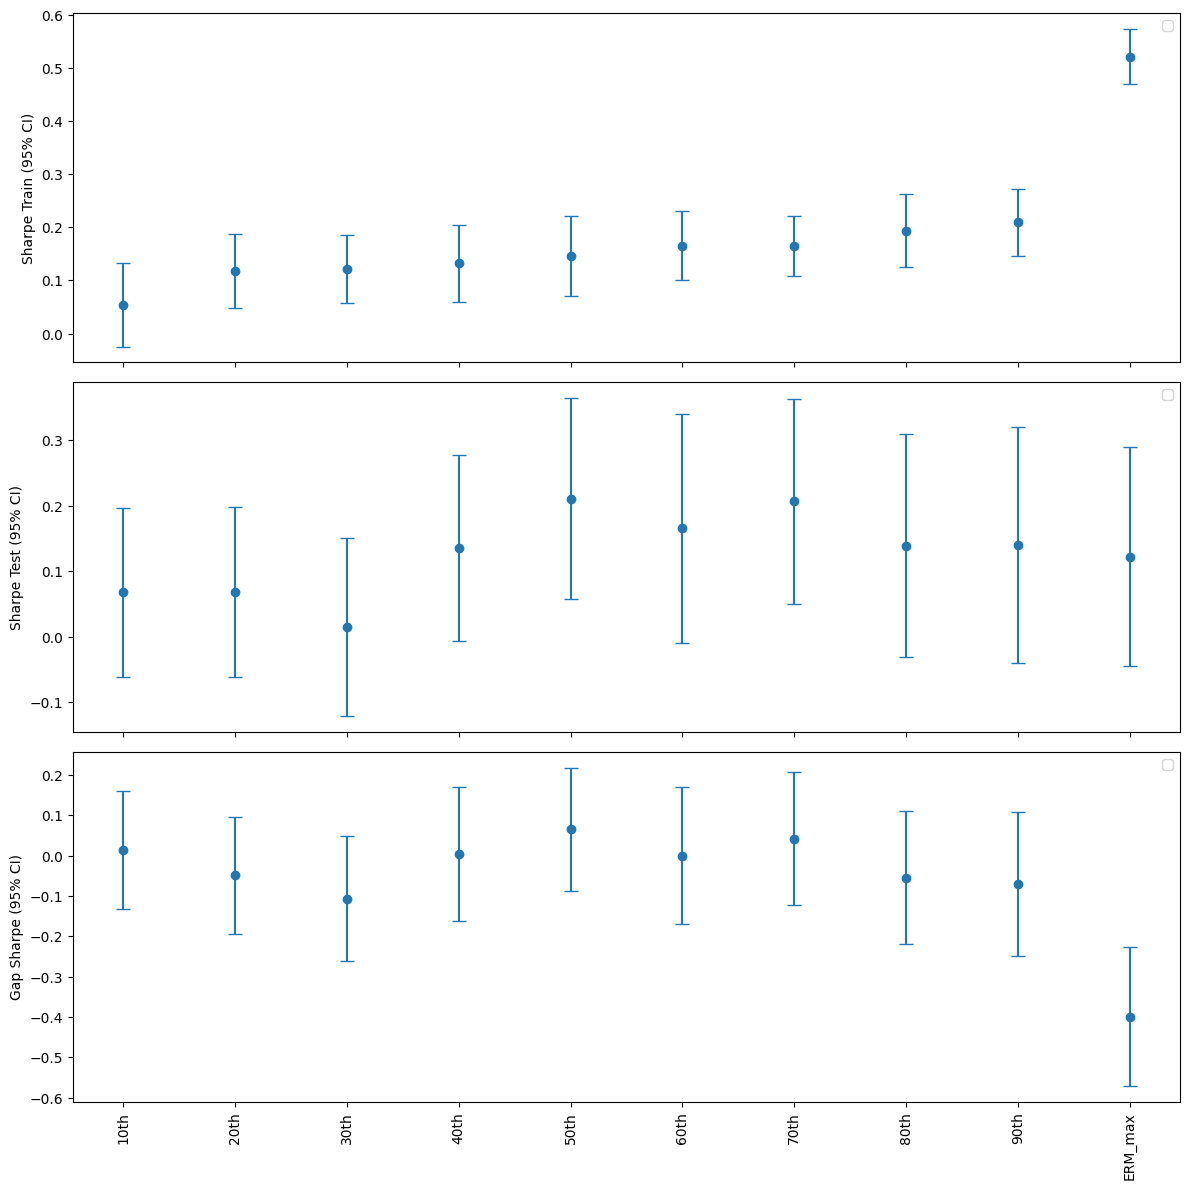

In [28]:
# function to compute CI for a series
def ci_normal(series, alpha=0.05):
    n = series.count()
    mean = series.mean()
    se = series.std(ddof=1) / np.sqrt(n)
    z = 1.96  # 95%
    lower = mean - z * se
    upper = mean + z * se
    return pd.Series({'mean': mean, 'lower': lower, 'upper': upper})

filtered_all_results_df = all_results_df.loc[all_results_df['name'] != 'max']

# apply per group
ci_df = filtered_all_results_df.groupby('name')[['Sharpe_train','Sharpe_test','Gap_Sharpe']].apply(
    lambda df: df.apply(ci_normal)
)

# Slice rows by the 2nd index level
ci_mean  = ci_df.xs('mean',  level=1)   # rows: name ; cols: metrics
ci_lower = ci_df.xs('lower', level=1)
ci_upper = ci_df.xs('upper', level=1)

metrics = ['Sharpe_train', 'Sharpe_test', 'Gap_Sharpe']
titles  = ['Sharpe Train (95% CI)', 'Sharpe Test (95% CI)', 'Gap Sharpe (95% CI)']

fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

for ax, metric, title in zip(axes, metrics, titles):
    means  = ci_mean[metric]
    lowers = ci_lower[metric]
    uppers = ci_upper[metric]

    ax.errorbar(
        means.index, means.values,
        yerr=[(means - lowers).values, (uppers - means).values],
        fmt='o', capsize=5,
    )
    ax.set_ylabel(title)
    # ax.set_title(title)
    ax.legend()

# axes[-1].set_xlabel("Model Name")
plt.xticks(rotation=90)
# fig.suptitle("Sharpe Ratios with 95% Confidence Intervals", fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipykernel_91206/3995428776.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


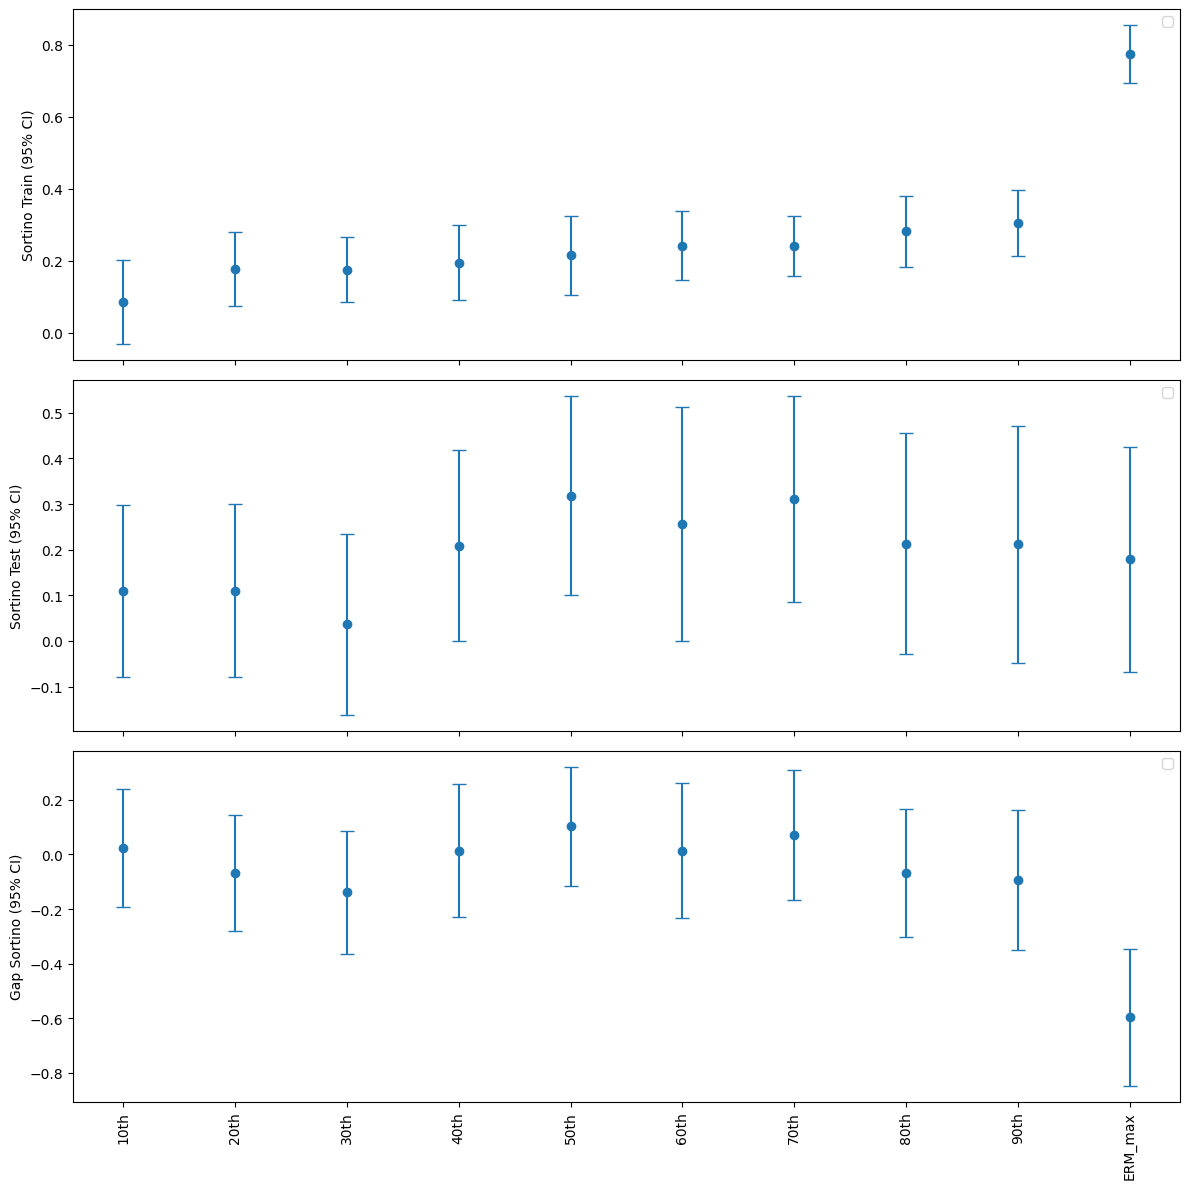

In [29]:
# apply per group
ci_df = filtered_all_results_df.groupby('name')[['Sortino_train','Sortino_test','Gap_Sortino']].apply(
    lambda df: df.apply(ci_normal)
)

# Slice rows by the 2nd index level
ci_mean  = ci_df.xs('mean',  level=1)   # rows: name ; cols: metrics
ci_lower = ci_df.xs('lower', level=1)
ci_upper = ci_df.xs('upper', level=1)

metrics = ['Sortino_train', 'Sortino_test', 'Gap_Sortino']
titles  = ['Sortino Train (95% CI)', 'Sortino Test (95% CI)', 'Gap Sortino (95% CI)']

fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

for ax, metric, title in zip(axes, metrics, titles):
    means  = ci_mean[metric]
    lowers = ci_lower[metric]
    uppers = ci_upper[metric]

    ax.errorbar(
        means.index, means.values,
        yerr=[(means - lowers).values, (uppers - means).values],
        fmt='o', capsize=5,
    )
    ax.set_ylabel(title)
    # ax.set_title(title)
    ax.legend()

# axes[-1].set_xlabel("Model Name")
plt.xticks(rotation=90)
# fig.suptitle("Sharpe Ratios with 95% Confidence Intervals", fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipykernel_91206/1515613820.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


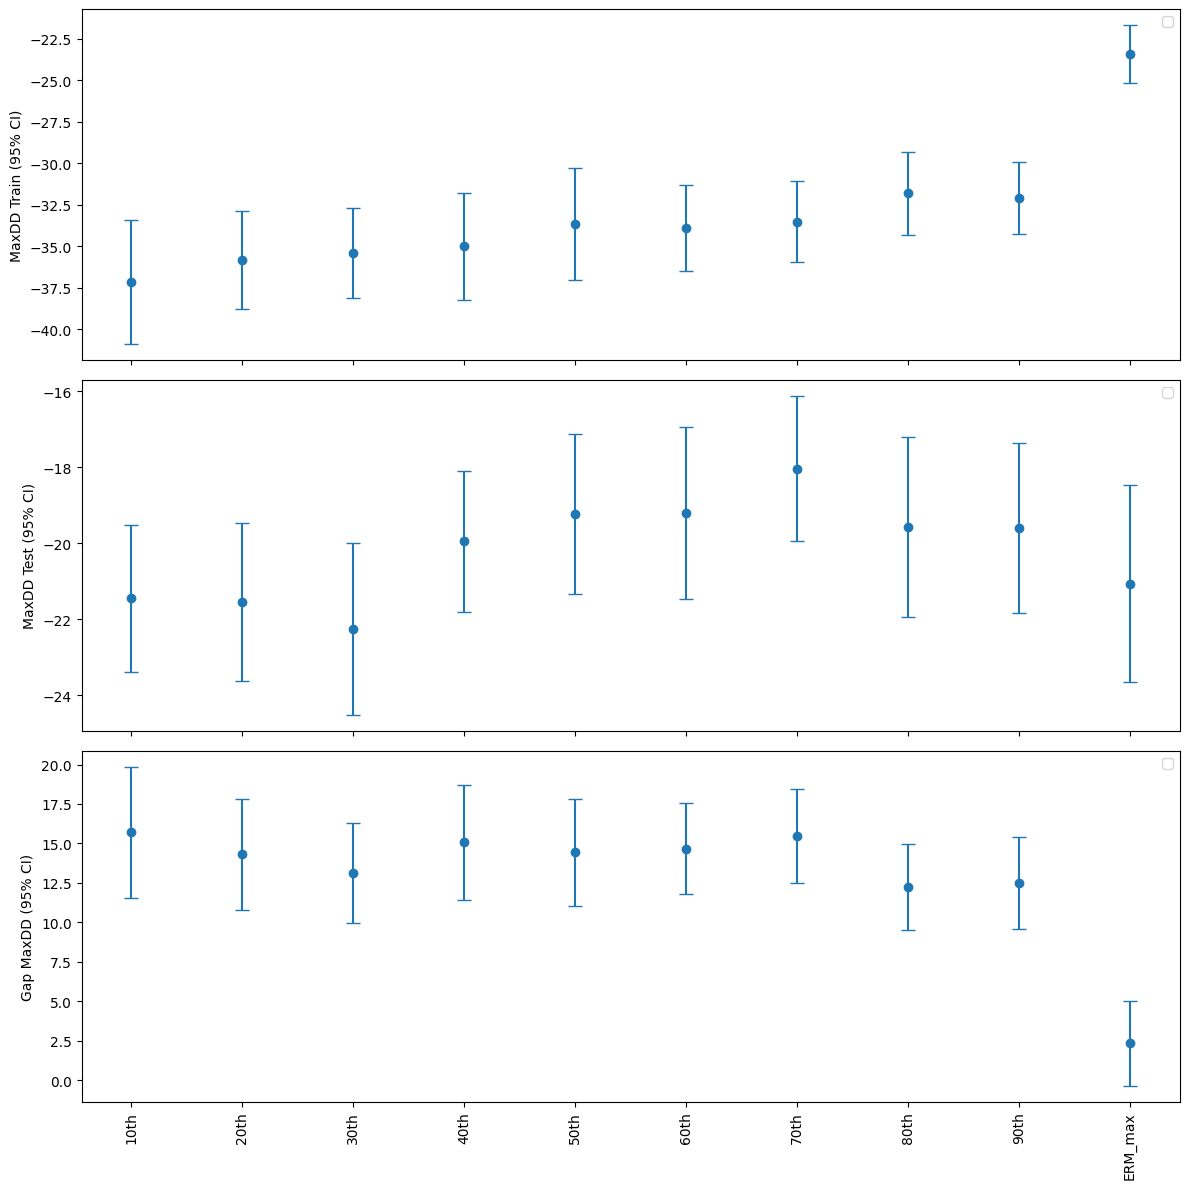

In [30]:
# apply per group
ci_df = filtered_all_results_df.groupby('name')[['MaxDD_train','MaxDD_test','Gap_MaxDD']].apply(
    lambda df: df.apply(ci_normal)
)

# Slice rows by the 2nd index level
ci_mean  = ci_df.xs('mean',  level=1)   # rows: name ; cols: metrics
ci_lower = ci_df.xs('lower', level=1)
ci_upper = ci_df.xs('upper', level=1)

metrics = ['MaxDD_train', 'MaxDD_test', 'Gap_MaxDD']
titles  = ['MaxDD Train (95% CI)', 'MaxDD Test (95% CI)', 'Gap MaxDD (95% CI)']

fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

for ax, metric, title in zip(axes, metrics, titles):
    means  = ci_mean[metric]
    lowers = ci_lower[metric]
    uppers = ci_upper[metric]

    ax.errorbar(
        means.index, means.values,
        yerr=[(means - lowers).values, (uppers - means).values],
        fmt='o', capsize=5,
    )
    ax.set_ylabel(title)
    # ax.set_title(title)
    ax.legend()

# axes[-1].set_xlabel("Model Name")
plt.xticks(rotation=90)
# fig.suptitle("Sharpe Ratios with 95% Confidence Intervals", fontsize=14)
plt.tight_layout()
plt.show()